# Proyeco final 2: Synergy Logistics

Importamos las librerias

In [1]:
import pandas as pd
import seaborn as sns

Abrimos el archivo csv

In [2]:
ubicacion = 'data/'
nombre = 'synergy_database.csv'

df = pd.read_csv(ubicacion + nombre, index_col = 'register_id')
df.head()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


Opción para analizar solo el ultimo año

In [3]:
'''
ultimo_a = df['year'].max()
df = df[df['year'] == ultimo_a]
print(ultimo_a)
df.head(10)
'''

"\nultimo_a = df['year'].max()\ndf = df[df['year'] == ultimo_a]\nprint(ultimo_a)\ndf.head(10)\n"

## Rutas de importación y exportación

Definimos una ruta como la combinación unica de:
- `origin`, `destination`, `transport_mode`


In [4]:
df_ruta = df[['origin', 'destination', 'transport_mode', 'total_value']]
df_ruta

,origin,destination,transport_mode,total_value
register_id,,,,
1,Japan,China,Sea,33000000
2,Japan,China,Sea,16000000
3,Japan,China,Sea,29000000
4,Japan,China,Sea,14000000
5,Japan,China,Sea,17000000
...,...,...,...,...
19052,Japan,Singapore,Sea,1000000
19053,Malaysia,Singapore,Sea,2000000
19054,Malaysia,Singapore,Sea,33000000


Agrupar las rutatas y sumar el valor de estas

In [5]:
rutas_unicas = df_ruta.groupby(['origin', 'destination', 'transport_mode']).sum()

Ordenar en base a `total_value`

In [6]:
rutas_valor = rutas_unicas.sort_values(by = 'total_value', ascending = False)
rutas_valor.head(10)

,,,total_value
origin,destination,transport_mode,
China,Mexico,Air,12250000000
Canada,Mexico,Rail,8450000000
South Korea,Vietnam,Sea,6877007000
France,United Kingdom,Sea,5427000000
South Korea,Japan,Sea,4741000000
China,South Korea,Rail,4535000000
USA,Mexico,Rail,4370000000
France,Belgium,Road,4257000000
China,Germany,Air,4090000000


Gráfica

Nueva columna para el nombre de la ruta

In [7]:
rutas_valor['nombre'] = rutas_valor.index.to_list()
rutas_valor.head()

,,,total_value,nombre
origin,destination,transport_mode,,
China,Mexico,Air,12250000000,"(China, Mexico, Air)"
Canada,Mexico,Rail,8450000000,"(Canada, Mexico, Rail)"
South Korea,Vietnam,Sea,6877007000,"(South Korea, Vietnam, Sea)"
France,United Kingdom,Sea,5427000000,"(France, United Kingdom, Sea)"
South Korea,Japan,Sea,4741000000,"(South Korea, Japan, Sea)"
China,South Korea,Rail,4535000000,"(China, South Korea, Rail)"
USA,Mexico,Rail,4370000000,"(USA, Mexico, Rail)"
France,Belgium,Road,4257000000,"(France, Belgium, Road)"
China,Germany,Air,4090000000,"(China, Germany, Air)"


Función para cambiar el nombre de la ultima columna con la ruta y el modo de transporte

In [8]:
def nombre_ruta(lista):
    nombre = f'{lista[0]}-{lista[1]}\n{lista[2]}'
    return nombre

rutas_valor['nombre'] = rutas_valor['nombre'].apply(nombre_ruta)

Cambiamos el color según el transporte

<AxesSubplot:xlabel='nombre', ylabel='total_value'>

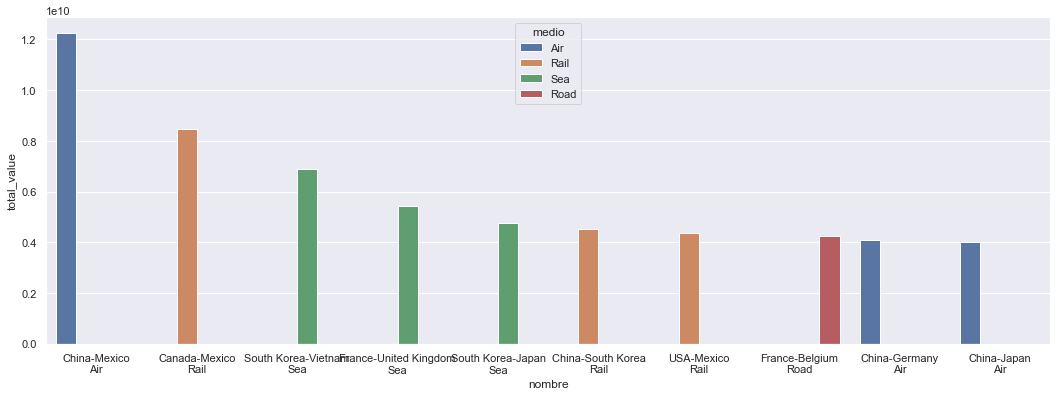

In [9]:
# Nueva columna, con el medio de transporte
rutas_valor['medio'] = rutas_valor.index.to_list()

# Función para cambiar el contenido de la columna
def medio_transp(text):
    return text[2]

# Aplicamos la transformación
rutas_valor['medio'] = rutas_valor['medio'].apply(medio_transp)

sns.set(rc={"figure.figsize": (18, 6)})  
sns.barplot(data=rutas_valor.head(10), x='nombre', y='total_value', hue='medio')

In [20]:
porcentaje = rutas_valor
porcentaje['porcentaje_acumulado']= 100 * (porcentaje.total_value.cumsum() / porcentaje.total_value.sum())
porcentaje_10 = porcentaje.head(10)
por_10 = porcentaje_10['porcentaje_acumulado'].max()
print(por_10)
porcentaje.head(20)

27.360865990986806


,,,total_value,nombre,medio,porcentaje_acumulado
origin,destination,transport_mode,,,,
China,Mexico,Air,12250000000,China-Mexico\nAir,Air,5.679413
Canada,Mexico,Rail,8450000000,Canada-Mexico\nRail,Rail,9.597049
South Korea,Vietnam,Sea,6877007000,South Korea-Vietnam\nSea,Sea,12.785405
France,United Kingdom,Sea,5427000000,France-United Kingdom\nSea,Sea,15.301501
South Korea,Japan,Sea,4741000000,South Korea-Japan\nSea,Sea,17.499550
China,South Korea,Rail,4535000000,China-South Korea\nRail,Rail,19.602092
USA,Mexico,Rail,4370000000,USA-Mexico\nRail,Rail,21.628136
France,Belgium,Road,4257000000,France-Belgium\nRoad,Road,23.601790
China,Germany,Air,4090000000,China-Germany\nAir,Air,25.498018


## Medio de transporte utilizado

In [11]:
transporte = df[['transport_mode', 'total_value']]

Agrupar por `transport_mode` y sumar los valores de `total_value` 

In [12]:
transporte_valor = df_ruta.groupby(['transport_mode']).sum()
transporte_valor = transporte_valor.sort_values(by = 'total_value', ascending = False)
transporte_valor

,total_value
transport_mode,
Sea,100530622000
Rail,43628043000
Air,38262147000
Road,33270486000


Gráfica

<AxesSubplot:xlabel='transport_mode', ylabel='total_value'>

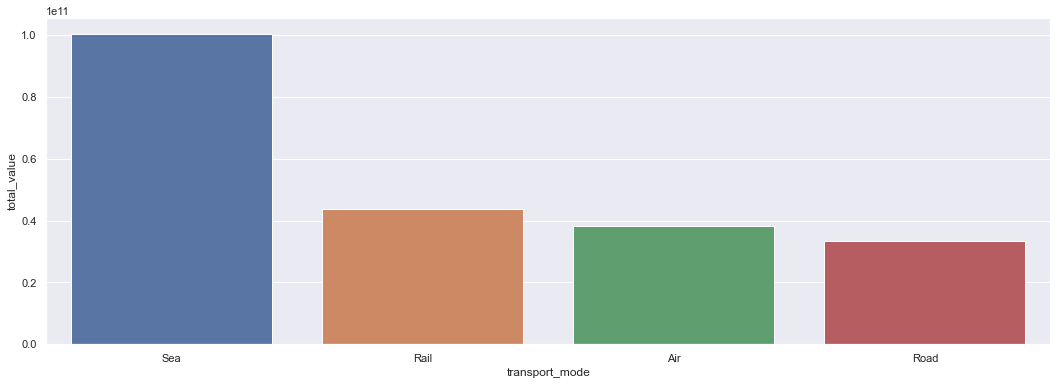

In [13]:
sns.set(rc = {'figure.figsize': (18, 6)})
sns.barplot(data = transporte_valor, y = 'total_value', x = transporte_valor.index)

In [18]:
porcentaje_2 = transporte_valor
porcentaje['porcentaje_acumulado']= 100 * (porcentaje_2.total_value.cumsum() / porcentaje_2.total_value.sum())
porcentaje

total_value  \
origin      destination    transport_mode                
China       Mexico         Air             12250000000   
Canada      Mexico         Rail             8450000000   
South Korea Vietnam        Sea              6877007000   
France      United Kingdom Sea              5427000000   
South Korea Japan          Sea              4741000000   
...                                                ...   
Netherlands Mexico         Sea                   28000   
France      Russia         Rail                  20000   
            Germany        Rail                  17000   
            Netherlands    Road                  14000   
            Austria        Rail                   7000   

                                                               nombre medio  \
origin      destination    transport_mode                                     
China       Mexico         Air                      China-Mexico\nAir   Air   
Canada      Mexico         Rail                   Canada-Mexico\nRail  Rail   
South Korea Vietnam        Sea               South Korea-Vietnam\nSea   Sea   
France      United Kingdom Sea             France-United Kingdom\nSea   Sea   
South Korea Japan          Sea                 South Korea-Japan\nSea   Sea   
...                                                               ...   ...   
Netherlands Mexico         Sea                Netherlands-Mexico\nSea   Sea   
France      Russia         Rail                   France-Russia\nRail  Rail   
            Germany        Rail                  France-Germany\nRail  Rail   
            Netherlands    Road              France-Netherlands\nRoad  Road   
            Austria        Rail                  France-Austria\nRail  Rail   

                                           porcentaje_acumulado  
origin      destination    transport_mode                        
China       Mexico         Air                              NaN  
Canada      Mexico         Rail                             NaN  
South Korea Vietnam        Sea                              NaN  
France      United Kingdom Sea                              NaN  
South Korea Japan          Sea                              NaN  
...                                                         ...  
Netherlands Mexico         Sea                              NaN  
France      Russia         Rail                             NaN  
            Germany        Rail                             NaN  
            Netherlands    Road                             NaN  
            Austria        Rail                             NaN  

[202 rows x 4 columns]

## Valor total de importaciones y exportaciones

Si Synergy Logistics quisiera enfocarse en los países que le generan el 80% del valor de las
exportaciones e importaciones ¿en qué grupo de países debería enfocar sus esfuerzos?

In [14]:
valor_total = df['total_value'].sum()
valor_total

215691298000

In [15]:
paises = df[['origin', 'total_value']]
paises = paises.groupby(['origin']).sum()
paises = paises.sort_values(by = 'total_value', ascending = False)

In [16]:
val = 0
cont = 0
val80 = valor_total*0.8

for value in paises['total_value']:
    val += value
    cont += 1
    if val >= val80:
        break

paises_80 = paises.iloc[0:cont,:]
paises_80

,total_value
origin,
China,45210046000
USA,23646306000
Japan,20042976000
France,19930332000
South Korea,18510146000
Germany,15593233000
Russia,14074000000
Canada,11253000000
Italy,6634684000


In [17]:
lista_paises = paises_80.index.to_list()
print(lista_paises)

['China', 'USA', 'Japan', 'France', 'South Korea', 'Germany', 'Russia', 'Canada', 'Italy']
